In [1]:
import numpy as np

import pennylane as qml

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", instance="ibm-q/open/main")
backend = service.backend("ibm_brisbane")

dev = qml.device('qiskit.remote', wires=2, backend=backend)

/var/folders/sv/m39t38x52kdbysd0pt25y9tr0000gp/T/ipykernel_30988/1324783056.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/sv/m39t38x52kdbysd0pt25y9tr0000gp/T/ipykernel_30988/1324783056.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [3]:
def plot_bloch_sphere():
    # plot the path on Bloch sphere!
    u = np.linspace(0, np.pi, 31)
    v = np.linspace(0, 2 * np.pi, 30)

    bloch_x = np.outer(np.sin(u), np.sin(v))
    bloch_y = np.outer(np.sin(u), np.cos(v))
    bloch_z = np.outer(np.cos(u), np.ones_like(v))

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_wireframe(bloch_x, bloch_y, bloch_z, color='k',alpha=0.1)
    ax.plot(np.cos(v), np.sin(v), 0, color='k', alpha=0.2)
    ax.set_box_aspect([1,1,1])
    ax.azim += 90
    plt.axis('off')

    # Make a 3D quiver plot
    x, y, z = np.zeros((3,3))
    u, v, w = np.array([[1.3,0,0],[0,1.3,0],[0,0,1.3]])

    ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.1, color='k')

    plt.tight_layout(pad=0.1)

    return ax

In [ ]:
@qml.qnode(dev)
def Rx_test(initial, theta, basis):

    # creates the initial state
    qml.RY(initial[0], wires=0)
    qml.RZ(initial[1], wires=0)

    # rotates around Y axis
    qml.RX(theta, wires=0)

    # changes basis for measurement
    if basis == "X":
        qml.Hadamard(wires=0)
    if basis == "Y":
        qml.S(wires=0)**(-1)
        qml.Hadamard(wires=0)

    return qml.probs(wires=[0])

In [ ]:
initial = [0,0.3*np.pi,0]

theta_list = np.array([0.05*x for x in range(30)])

psi_x, psi_y, psi_z = [], [], []

x_probs = Rx_test(initial, theta_list, basis="X")
psi_x = x_probs[0] - x_probs[1]

y_probs = Rx_test(initial, theta_list, basis="Y")
psi_y = y_probs[0] - y_probs[1]

z_probs = Rx_test(initial, theta_list, basis="Z")
psi_z = z_probs[0] - z_probs[1]

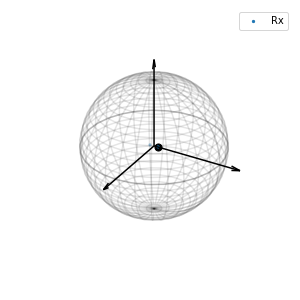

In [ ]:
ax = plot_bloch_sphere()

ax.scatter(psi_x, psi_y, psi_z, marker='.', c="C0", label="Rx")
ax.scatter(psi_x[0], psi_y[0], psi_z[0], marker='o', s=50, c="k")

plt.legend()

plt.show()

In [4]:
@qml.qnode(dev)
def Rx_circuit(initial, theta, operator):

    # creates the initial state
    qml.RY(initial[0], wires=0)
    qml.RZ(initial[1], wires=0)

    # rotates around Y axis
    qml.RX(theta, wires=0)

    return qml.expval(operator)

@qml.qnode(dev)
def Ry_circuit(initial, theta, operator):

    # creates the initial state
    qml.RY(initial[0], wires=0)
    qml.RZ(initial[1], wires=0)

    # rotates around Y axis
    qml.RY(theta, wires=0)

    return qml.expval(operator)

@qml.qnode(dev)
def Rz_circuit(initial, theta, operator):

    # creates the initial state
    qml.RY(initial[0], wires=0)
    qml.RZ(initial[1], wires=0)

    # rotates around Y axis
    qml.RZ(theta, wires=0)

    return qml.expval(operator)

In [5]:
initial = [0,0.3*np.pi,0]

theta_list = np.array([0.05*x for x in range(30)])

ax = plot_bloch_sphere()

# x rotation
psi_x = Rx_circuit(initial, theta_list, qml.PauliX(0))
psi_y = Rx_circuit(initial, theta_list, qml.PauliY(0))
psi_z = Rx_circuit(initial, theta_list, qml.PauliZ(0))
ax.scatter(psi_x, psi_y, psi_z, marker='.', c="C0", label="Rx")

# x rotation
psi_x = Ry_circuit(initial, theta_list, qml.PauliX(0))
psi_y = Ry_circuit(initial, theta_list, qml.PauliY(0))
psi_z = Ry_circuit(initial, theta_list, qml.PauliZ(0))
ax.scatter(psi_x, psi_x, psi_x, marker='.', c="C0", label="Rx")

# x rotation
psi_x = Rz_circuit(initial, theta_list, qml.PauliX(0))
psi_y = Rz_circuit(initial, theta_list, qml.PauliY(0))
psi_z = Rz_circuit(initial, theta_list, qml.PauliZ(0))
ax.scatter(psi_x, psi_x, psi_x, marker='.', c="C0", label="Rx")

ax.scatter(psi_x[0], psi_y[0], psi_z[0], marker='o', s=50, c="k")

plt.legend()

plt.show()